In [1]:
import ast
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)


c:\Users\nonst\anaconda3\envs\python_work\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df_Africa = df[((df['job_country'] == 'South Africa') |  (df['job_country'] == 'Sudan') | (df['job_country'] == 'Egypt') | (df['job_country'] == 'Kenya') | (df['job_country'] == 'Nigeria'))].dropna(subset='salary_year_avg')
df_Africa

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"[mongodb, mongodb, python, r, sql, mysql, mari...","{'analyst_tools': ['tableau'], 'cloud': ['orac..."
545,Data Engineer,ERP Data Engineer,"Lansing, MI",via LinkedIn,Full-time,False,Sudan,2023-01-04 13:58:44,False,False,Sudan,year,80000.0,NaN,Venteon,"[sql, sap]","{'analyst_tools': ['sap'], 'programming': ['sq..."
573,Senior Data Engineer,Senior Python Data Engineer,"Wilmington, DE",via Indeed,Full-time,False,Sudan,2023-09-16 13:13:50,False,False,Sudan,year,160000.0,NaN,Crackajack Solutions,"[python, sql, java, aws, databricks, redshift,...","{'cloud': ['aws', 'databricks', 'redshift'], '..."
654,Data Engineer,Lead Data Engineer (DataStage) (Need only loca...,"Cincinnati, OH",via Dice.com,Contractor,False,Sudan,2023-09-22 13:38:56,True,False,Sudan,year,70000.0,NaN,Strategic Systems Inc,None,None
733,Senior Data Engineer,Senior Data Engineer,"Oakland, CA",via LinkedIn,Full-time,False,Sudan,2023-07-06 13:41:35,False,False,Sudan,year,160000.0,NaN,X4 Life Sciences,"[python, sql, postgresql, sql server, aws, sno...","{'cloud': ['aws', 'snowflake'], 'databases': [..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780050,Data Scientist,"Lead Data Scientist (Colorado Springs, CO)","Denver, CO",via Built In Colorado,Full-time,False,Sudan,2023-01-22 06:22:28,False,True,Sudan,year,136950.0,NaN,Spectrum,"[r, python, sql, sas, sas, hadoop, spark, linu...","{'analyst_tools': ['sas', 'spss', 'alteryx'], ..."
782984,Data Engineer,Lead Data Engineer,"Johannesburg, South Africa",via Ai-Jobs.net,Full-time,False,South Africa,2023-05-02 06:25:02,True,False,South Africa,year,131580.0,NaN,iOLAP,"[python, sql, aws, flow]","{'cloud': ['aws'], 'other': ['flow'], 'program..."
783818,Data Scientist,Associate Data Scientist: Web,United States,via Ai-Jobs.net,Full-time,False,Sudan,2023-01-11 07:01:46,False,True,Sudan,year,87307.5,NaN,Rockstar Games,"[javascript, html, css, sql, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
783868,Data Engineer,Data Engineer / San Francisco,"San Francisco, CA",via Motion Recruitment,Full-time,False,Sudan,2023-04-12 06:59:59,False,False,Sudan,year,145000.0,NaN,Motion Recruitment,"[python, sql, mongodb, mongodb, aws, gcp, spar...","{'cloud': ['aws', 'gcp'], 'databases': ['mongo..."


In [29]:
job_titles = df_Africa['job_title_short'].value_counts().index[:6].tolist()
df_af_top6 = df_Africa[df_Africa['job_title_short'].isin (job_titles)]
job_order = df_af_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index



Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Scientist',
       'Data Engineer', 'Data Analyst', 'Business Analyst'],
      dtype='object', name='job_title_short')

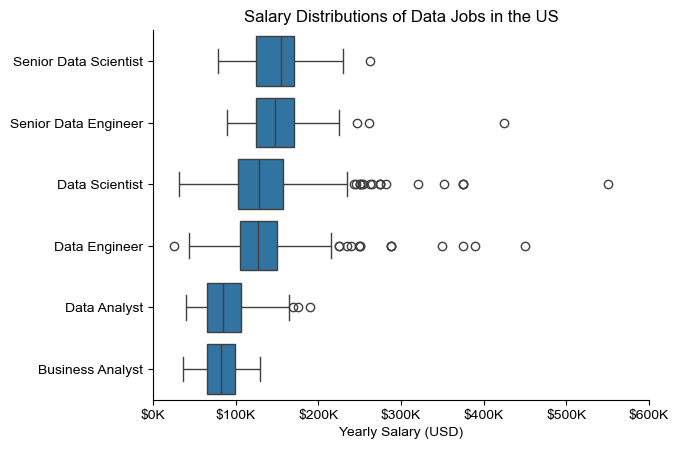

In [30]:
sns.boxplot(data=df_af_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Salary Distributions of Data Jobs in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [35]:
df_DA_Africa = df[((df['job_country'] == 'South Africa') |  (df['job_country'] == 'Sudan') | (df['job_country'] == 'Egypt') | (df['job_country'] == 'Kenya') | (df['job_country'] == 'Nigeria')) & (df['job_title_short'] == 'Data Analyst')].dropna(subset='salary_year_avg')
df_DA_Africa

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
2390,Data Analyst,Data Analyst,"Midland, TX",via Indeed,Full-time,False,Sudan,2023-08-25 13:40:40,False,True,Sudan,year,70000.0,NaN,"Advanced Stimulation Technologies, Inc","[c, outlook, word, excel, powerpoint]","{'analyst_tools': ['outlook', 'word', 'excel',..."
4709,Data Analyst,Data Analyst,Anywhere,via LinkedIn,Full-time,True,Sudan,2023-10-09 13:40:58,False,False,Sudan,year,77500.0,NaN,Simplex.,"[python, sql, sqlite, snowflake, azure]","{'cloud': ['snowflake', 'azure'], 'databases':..."
9448,Data Analyst,Marketing Data Analyst,"Dallas, TX",via Ai-Jobs.net,Full-time,False,Sudan,2023-08-17 13:38:18,False,False,Sudan,year,90000.0,NaN,OrderMyGear,"[sql, looker, excel, tableau, power bi]","{'analyst_tools': ['looker', 'excel', 'tableau..."
13750,Data Analyst,Data Conversion Analyst,Anywhere,via LinkedIn,Full-time,True,Sudan,2023-06-23 14:21:18,False,False,Sudan,year,100000.0,NaN,Insight Global,[power bi],{'analyst_tools': ['power bi']}
35631,Data Analyst,Data Analyst must have telecom domain experince,Anywhere,via LinkedIn,Contractor,True,Sudan,2023-04-28 13:56:12,True,False,Sudan,year,130000.0,NaN,ApTask,"[sql, python, sheets, flow]","{'analyst_tools': ['sheets'], 'other': ['flow'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764620,Data Analyst,Data Analyst,Anywhere,via LinkedIn,Full-time,True,Sudan,2023-04-28 20:56:12,True,False,Sudan,year,87500.0,NaN,Insight Global,"[sql, c#, sql server, excel, flow]","{'analyst_tools': ['excel'], 'databases': ['sq..."
768494,Data Analyst,"Data Analyst / Data Scientist, Wholesale","Dallas, TX",via Talentify,Full-time,False,Sudan,2023-06-29 02:26:06,False,False,Sudan,year,118965.0,NaN,Frontier Communications,"[python, pandas, excel, alteryx]","{'analyst_tools': ['excel', 'alteryx'], 'libra..."
771222,Data Analyst,IT Data Analyst,"Amarillo, TX",via Ladders,Full-time,False,Sudan,2023-01-07 02:05:34,False,True,Sudan,year,115000.0,NaN,Xcel Energy,None,None
771454,Data Analyst,Data Analyst,United States,via Ai-Jobs.net,Full-time,False,Sudan,2023-06-21 02:00:05,False,False,Sudan,year,100500.0,NaN,Govini,"[python, r]","{'programming': ['python', 'r']}"


In [43]:
df_DA_Africa = df_DA_Africa.explode('job_skills')
df_DA_Africa[['job_skills','salary_year_avg']].head(5)

,job_skills,salary_year_avg
2390,c,70000.0
2390,outlook,70000.0
2390,word,70000.0
2390,excel,70000.0
2390,powerpoint,70000.0


In [50]:
df_DA_top_pay = df_DA_Africa.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending= False)

df_DA_top_pay = df_DA_top_pay.head(10)
df_DA_top_pay

,count,median
job_skills,,
atlassian,1,190000.00
unity,1,169833.50
confluence,1,138516.00
jira,3,138516.00
express,1,134840.00
matlab,7,125000.00
git,2,124000.00
github,2,123430.00
node.js,2,123123.25


In [53]:
df_DA_skills = df_DA_Africa.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending= False)
df_DA_skills = df_DA_skills.head(10)

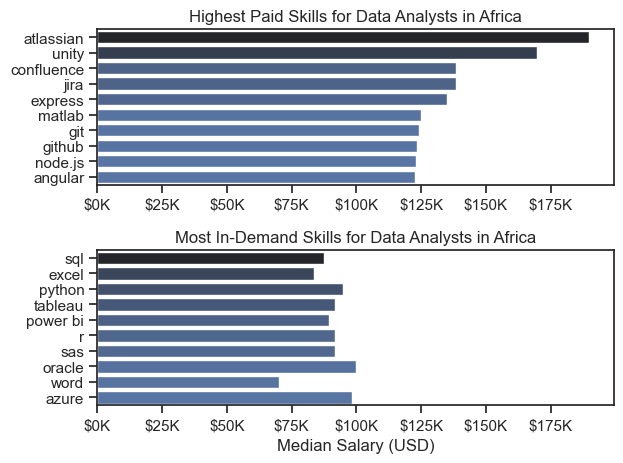

In [60]:
fig,ax = plt.subplots(2,1)
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts in Africa')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='count', ax=ax[1], palette='dark:b_r')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in Africa')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()